<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
# Load data
file_path = "/content/processed_data (1).csv"
df = pd.read_csv(file_path)

In [24]:
# Drop irrelevant column
df = df.drop(columns=["Customer_ID"])

In [25]:
# Remove class 3 due to insufficient data
df = df[df["cluster_catgeory"] != 3]

In [26]:
# Split data
X = df.drop(columns=["cluster_catgeory"])
y = df["cluster_catgeory"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [28]:
# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [29]:
# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [30]:
# Cross-validation score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

In [40]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

<ipython-input-41-0089aa104aa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


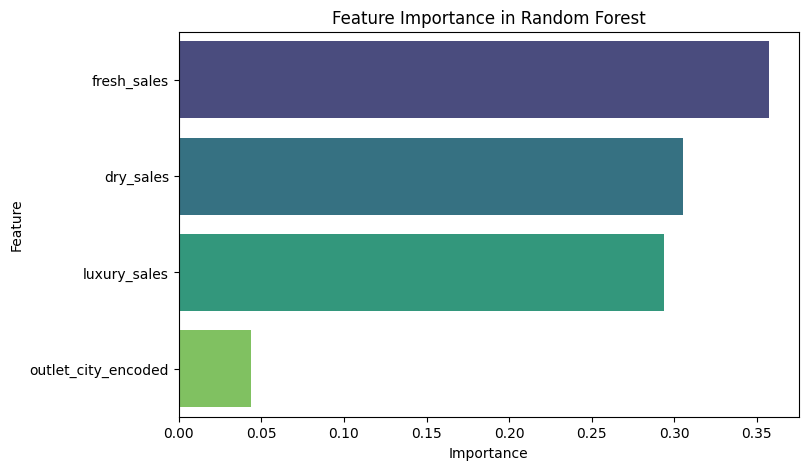

In [41]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()

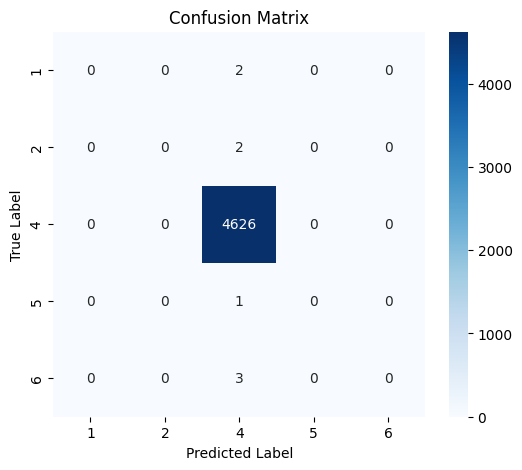

In [42]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [43]:
# Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9995
Test Accuracy: 0.9983
Cross-validation Accuracy: 0.9988
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      4626
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           1.00      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      1.00      1.00      4634



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
# Print Overfitting Indicators
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

Train Accuracy: 0.9995
Test Accuracy: 0.9983
Cross-validation Accuracy: 0.9988
